### Generating random numbers with a distribution

This notebook gives an example of how to generate a set of random numbers that respect an arbitrary probability distribution that you specify.  For standard distributions, there are often slicker ways, but this way is quite general.

Let's say that you want to generate random numbers between 0 and 10 and you want the probability of picking a number $x$ to be proportional to $x^2$.

In [3]:
# import standard packages
import numpy as np
import matplotlib.pyplot as plt

The code below generates 100000 random numbers distributed with our chosen probability distribution.

In [4]:
n_nums = 100000  # the number of random numbers that we want

# define an array to hold the random numbers with the distribution that we want
kept_nums = np.zeros(n_nums)  

# we want numbers between 0 and 10, so define the min and max
nmin = 0  
nmax = 10  

for i in range(n_nums):  # we'll do the below for each random number that we want to pick
    num = -1
    while(num == -1):  # keep picking random numbers until we get one we want to keep
        # np.random.random() gives a uniformly-distributed random number in the half-open interval [0,1)
        # first adjust this to the range of numbers that we want
        rand_num = np.random.random()*(nmax-nmin) + nmin  # this gives a random number uniformly distributed between nmin and nmax

        # we don't want a uniform distribution, so we'll keep our number with a probability proportional
        # to the probability distribution that we want
        # in this case, we want a probability f(x) proportional to x^2
        # normalize it so that the number with the maximum probability (in this case 10) has a probability of 1
        # f(x) = (x/10)^2 = (rand_num/nmax)^2
        
        # (note that if you make the maximum proability greater than 1, this code won't distinguish
        # between numbers that have different probabilities > 1 and you won't get the right distribution;
        # if you make the maximum probability less than 1, it will work but it will be inefficient since
        # it will throw away more numbers than it needs to)
         
        pkeep = (rand_num/nmax)**2  # the probability that we want to keep the number we drew 
        
        # pick a uniformly distributed random number between 0 and 1 and if it's less than pkeep, keep the number
        # this means that the number had a probability pkeep of being kept
        if np.random.random() <= pkeep:
            num = rand_num
    
    # add our number to the list of kept numbers
    kept_nums[i] = num

Plot a histogram of the random numbers that we drew to see if it matches.

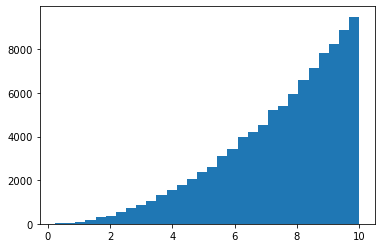

In [5]:
plt.hist(kept_nums, bins=30)
plt.show()

We can add a line to the histogram to double check that it matches.

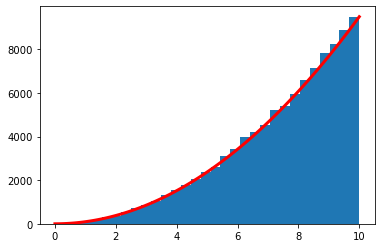

In [14]:
x = np.linspace(nmin,nmax,100) # 100 evenly spaced numbers between 0 and 10
norm_max = np.max(np.histogram(kept_nums, bins=30)[0]) # get the maximum number in a histogram bin
fx = norm_max*(x/nmax)**2  # the probability distribution proportional to x^2

plt.hist(kept_nums, bins=30)
plt.plot(x,fx,'r',linewidth=3)
plt.show()

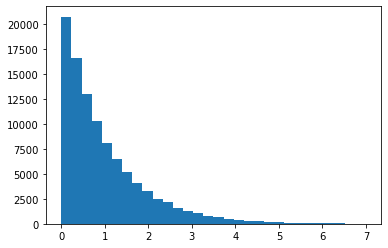

In [17]:
#2a) 
n_nums = 100000  # the number of random numbers that we want

# define an array to hold the random numbers with the distribution that we want
kept_nums = np.zeros(n_nums) 
x = np.random.random(n_nums)
y = np.random.random(n_nums)
# we want numbers between 0 and 10, so define the min and max
H = 1.0
zmin = 0
zmax = 7*H


for i in range(n_nums):  # we'll do the below for each random number that we want to pick
    num = -1
    while(num == -1):  # keep picking random numbers until we get one we want to keep
        # np.random.random() gives a uniformly-distributed random number in the half-open interval [0,1)
        # first adjust this to the range of numbers that we want
        rand_num = np.random.random()*(zmax-zmin) + zmin  # this gives a random number uniformly distributed between nmin and nmax

         
        pkeep = np.exp(-rand_num/H)  # the probability that we want to keep the number we drew 
        
        if np.random.random() <= pkeep:
            num = rand_num
    
    # add our number to the list of kept numbers
    kept_nums[i] = num

plt.hist(kept_nums, bins = 30)
plt.show()

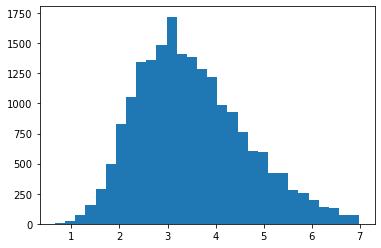

In [22]:
#2b)
photons = 20000
b = 0.008
sig = np.pi*b**2
x_photon = np.random.random(photons)
y_photon = np.random.random(photons)

collision_height = np.zeros(photons)

for i in range(photons):
    will_collide = np.where(np.sqrt((x - x_photon[i])**2 + (y - y_photon[i])**2) < b)
    #print(will_collide)
    collision_height[i] = np.max(kept_nums[will_collide])
    #print(collision_height[i])
plt.hist(collision_height, bins = 30)
plt.show()

#most photons collide at a height of about 3H

In [27]:
#2c)
#volume is 1x1 and has heights from 0 to 1H
#I'd assume most get absorbed at 3, and this means 3ish will have closest optical depth to 1
n0 = len(np.where(kept_nums < H)[0])/H
for i in range(1,8,1):
    z = i
    n = n0*np.exp(-z/H)
    opt_depth = n*sig*H
    print(opt_depth)
#so 3 is the closest but it's still kinda far


4.665292232535219
1.716265099406527
0.6313786456717231
0.23227122333729555
0.08544780784153157
0.03143449179806742
0.01156410327618133


In [48]:
z = 2.5
n = n0*np.exp(-z/H)
opt_depth = n*sig*H
print(opt_depth)
#much better
#so 3 is closest integer value of H but 2.5H is closer

1.0409674029848093
